https://www.kaggle.com/c/ga-customer-revenue-prediction

In [9]:
import os # it's a operational system library, to set some informations
import random # random is to generate random values

In [10]:
import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values


In [11]:
import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

In [12]:
#  !pip install squarify
#  !pip install plotly

In [13]:
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

In [14]:
import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json fi

In [15]:
from os import path
from fastai.text import *

In [16]:
# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

In [17]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [22]:
PATH=Path('../data/kg-google/')

In [23]:
p=0.07

In [24]:
def json_read(filename):
    df = pd.read_csv(PATH/filename,
                     converters={column: json.loads for column in columns},
                     dtype={'fullVisitorId': 'str'},
                     skiprows=lambda i : i> 0 and random.random() > p)
    
    for column in columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f'{column}.{subcolumn}' for subcolumn in  column_as_df.columns]
        df = df.drop(column,axis=1).merge(column_as_df,right_index=True,left_index=True)
        
#     print(f'Loaded {os,path.basename(data_frame)}. Shape: {df.shape}')
    return df    

In [25]:
df_train = json_read('train_v2.csv')

In [26]:
df_train.head()

channelGrouping                            customDimensions      date  \
0  Organic Search           [{'index': '4', 'value': 'EMEA'}]  20171016   
1  Organic Search           [{'index': '4', 'value': 'APAC'}]  20171016   
2  Organic Search           [{'index': '4', 'value': 'EMEA'}]  20171016   
3        Referral           [{'index': '4', 'value': 'APAC'}]  20171016   
4         Display  [{'index': '4', 'value': 'North America'}]  20171016   

         fullVisitorId                                               hits  \
0  2631312367160271984  [{'hitNumber': '1', 'time': '0', 'hour': '9', ...   
1  7979131263881451334  [{'hitNumber': '1', 'time': '0', 'hour': '12',...   
2  2227276092641173528  [{'hitNumber': '1', 'time': '0', 'hour': '9', ...   
3    12084665175931969  [{'hitNumber': '1', 'time': '0', 'hour': '22',...   
4  9015797273080767698  [{'hitNumber': '1', 'time': '0', 'hour': '19',...   

   socialEngagementType     visitId  visitNumber  visitStartTime  \
0  Not Socially Engaged  1508170914            1      1508170914   
1  Not Socially Engaged  1508183432            1      1508183432   
2  Not Socially Engaged  1508170696            1      1508170696   
3  Not Socially Engaged  1508219581            1      1508219581   
4  Not Socially Engaged  1508206108            1      1508206108   

  device.browser          ...          trafficSource.adwordsClickInfo.gclId  \
0         Chrome          ...                                           NaN   
1         Chrome          ...                                           NaN   
2         Chrome          ...                                           NaN   
3         Chrome          ...                                           NaN   
4         Chrome          ...                    CODVoMjJ9tYCFUIvgQod_dsKEA   

  trafficSource.adwordsClickInfo.isVideoAd  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                    False   

  trafficSource.adwordsClickInfo.page trafficSource.adwordsClickInfo.slot  \
0                                 NaN                                 NaN   
1                                 NaN                                 NaN   
2                                 NaN                                 NaN   
3                                 NaN                                 NaN   
4                                   3                                 RHS   

                              trafficSource.campaign  \
0                                          (not set)   
1                                          (not set)   
2                                          (not set)   
3                                          (not set)   
4  1000557 | GA | US | en | Hybrid | GDN Text+Ban...   

  trafficSource.isTrueDirect trafficSource.keyword trafficSource.medium  \
0                        NaN        (not provided)              organic   
1                        NaN        (not provided)              organic   
2                        NaN        (not provided)              organic   
3                        NaN                   NaN             referral   
4                        NaN  (automatic matching)                  cpc   

  trafficSource.referralPath  trafficSource.source  
0                        NaN                google  
1                        NaN                google  
2                        NaN                google  
3            /analytics/web/  analytics.google.com  
4                        NaN                google  

[5 rows x 59 columns]

In [27]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    print("\n Total of Sales % of Total: ", round((df_train[df_train['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))
    return 

In [28]:
missing_values(df_train) 

Total columns at least one Values: 
                                               Total    Percent
totals.totalTransactionRevenue                117800  98.961659
totals.transactionRevenue                     117800  98.961659
totals.transactions                           117795  98.957458
trafficSource.adContent                       114490  96.180987
trafficSource.adwordsClickInfo.slot           113733  95.545045
trafficSource.adwordsClickInfo.page           113733  95.545045
trafficSource.adwordsClickInfo.isVideoAd      113733  95.545045
trafficSource.adwordsClickInfo.adNetworkType  113733  95.545045
trafficSource.adwordsClickInfo.gclId          113723  95.536644
trafficSource.isTrueDirect                     81512  68.476763
trafficSource.referralPath                     79482  66.771397
trafficSource.keyword                          73536  61.776269
totals.timeOnSite                              61025  51.266004
totals.sessionQualityDim                       58265  48.947377
tota

### Function to handle datetime

In [29]:
from datetime import datetime
def date_process(df):
    df["date"] = pd.to_datetime(df["date"],format="%Y%m%d")
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    return df

In [30]:
df_train = date_process(df_train)
df_train.head()

channelGrouping                            customDimensions       date  \
0  Organic Search           [{'index': '4', 'value': 'EMEA'}] 2017-10-16   
1  Organic Search           [{'index': '4', 'value': 'APAC'}] 2017-10-16   
2  Organic Search           [{'index': '4', 'value': 'EMEA'}] 2017-10-16   
3        Referral           [{'index': '4', 'value': 'APAC'}] 2017-10-16   
4         Display  [{'index': '4', 'value': 'North America'}] 2017-10-16   

         fullVisitorId                                               hits  \
0  2631312367160271984  [{'hitNumber': '1', 'time': '0', 'hour': '9', ...   
1  7979131263881451334  [{'hitNumber': '1', 'time': '0', 'hour': '12',...   
2  2227276092641173528  [{'hitNumber': '1', 'time': '0', 'hour': '9', ...   
3    12084665175931969  [{'hitNumber': '1', 'time': '0', 'hour': '22',...   
4  9015797273080767698  [{'hitNumber': '1', 'time': '0', 'hour': '19',...   

   socialEngagementType     visitId  visitNumber  visitStartTime  \
0  Not Socially Engaged  1508170914            1      1508170914   
1  Not Socially Engaged  1508183432            1      1508183432   
2  Not Socially Engaged  1508170696            1      1508170696   
3  Not Socially Engaged  1508219581            1      1508219581   
4  Not Socially Engaged  1508206108            1      1508206108   

  device.browser    ...     trafficSource.isTrueDirect trafficSource.keyword  \
0         Chrome    ...                            NaN        (not provided)   
1         Chrome    ...                            NaN        (not provided)   
2         Chrome    ...                            NaN        (not provided)   
3         Chrome    ...                            NaN                   NaN   
4         Chrome    ...                            NaN  (automatic matching)   

  trafficSource.medium trafficSource.referralPath  trafficSource.source  \
0              organic                        NaN                google   
1              organic                        NaN                google   
2              organic                        NaN                google   
3             referral            /analytics/web/  analytics.google.com   
4                  cpc                        NaN                google   

  _weekday _day _month _year _visitHour  
0        0   16     10  2017         12  
1        0   16     10  2017         15  
2        0   16     10  2017         12  
3        0   16     10  2017          1  
4        0   16     10  2017         22  

[5 rows x 64 columns]

In [31]:
def NumericalColumns(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['totals.pageviews'] = df['totals.pageviews'].astype(int) # setting numerical column as integer
    df['totals.newVisits'] = df['totals.newVisits'].astype(int) # setting numerical column as integer
    df['totals.bounces'] = df['totals.bounces'].astype(int)  # setting numerical column as integer
    df["totals.hits"] = df["totals.hits"].astype(float) # setting numerical to float
    df['totals.visits'] = df['totals.visits'].astype(int) # seting as int

    return df #return the transformed dataframe

In [32]:
def FillingNaValues(df):
#     df['totals.pageviews'].fillna(1,inplace=True).astype(int)
#     df['totals.newVisits'].fillna(0, inplace=True).astype(int) #filling NA's with 0
#     df['totals.bounces'].fillna(0, inplace=True).astype(int)   #filling NA's with 0
#     df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
#     df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
#     df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df_train.loc[df_train['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = np.nan
    df_train['geoNetwork.city'].fillna("NaN", inplace=True)

    return df #return the transformed dataframe

In [33]:
df_train = NumericalColumns(df_train)

In [34]:
df_train = FillingNaValues(df_train)

In [35]:
from sklearn import preprocessing
def Normalizing(df):
    df["totals.hits"] =  (df['totals.hits'] - min(df['totals.hits'])) / (max(df['totals.hits'])  - min(df['totals.hits']))
    # normalizing the transaction Revenue
    df['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].apply(lambda x: np.log1p(x))
    # return the modified df
    return df 

In [36]:
df_train = Normalizing(df_train)

### Constant columns

In [37]:
discovering_consts = [col for col in df_train.columns if df_train[col].nunique() ==1]
print("Columns with just one value: ", len(discovering_consts), "columns")
print("Name of constant columns: \n", discovering_consts)

Columns with just one value:  19 columns
Name of constant columns: 
 ['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters']


In [38]:
not_aval_cols = ['socialEngagementType','device.browserSize','device.browserVersion', 'device.flashVersion', 
                 'device.language' ,'device.mobileDeviceBranding', 'device.mobileDeviceInfo','device.mobileDeviceMarketingName',
                 'device.mobileDeviceModel', 'device.mobileInputSelector' , 'device.operatingSystemVersion','device.screenColors',
                 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude' ,'geoNetwork.longitude',
                 'geoNetwork.networkLocation','trafficSource.adwordsClickInfo.criteriaParameters']

In [39]:
def knowningData(df, data_type=object, limit=3): #seting the function with df, 
    n = df.select_dtypes(include=data_type) #selecting the desired data type
    for column in n.columns: #initializing the loop
        print("##############################################")
        print("Name of column ", column, ': \n', "Uniques: ", df[column].unique()[:limit], "\n",
              " | ## Total nulls: ", (round(df[column].isnull().sum() / len(df[column]) * 100,2)),
              " | ## Total unique values: ", df_train.nunique()[column]) #print the data and % of nulls)
        # print("Percentual of top 3 of: ", column)
        # print(round(df[column].value_counts()[:3] / df[column].value_counts().sum() * 100,2))
        print("#############################################")

In [40]:
to_drop = ["socialEngagementType",'device.browserVersion', 'device.browserSize', 'device.flashVersion', 'device.language', 
           'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
           'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 
           'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude','geoNetwork.networkLocation', 
           'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.campaign',
           'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.slot',
           'trafficSource.adContent', 'trafficSource.keyword']

In [41]:
df_train.drop(to_drop, axis=1, inplace=True)

In [42]:
print("Total features dropped: ", len(to_drop))
print("Shape after dropping: ", df_train.shape)

Total features dropped:  25
Shape after dropping:  (119036, 39)


In [43]:
df_train = NumericalColumns(df_train)

# Call the function that will normalize some features
df_train = Normalizing(df_train)

In [44]:
# We will takeoff all columns where we have a unique value
# It is useful because this columns don't give us none information
clean_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]


# this function drop all constant columns, inplacing the data 
df_train.drop('trafficSource.adwordsClickInfo.adNetworkType', axis=1, inplace=True) 

# printing the total of columns dropped and the name of columns 
print("This useful action will drop: ", len(clean_consts), "columns")
print("All dropped columns: \n", clean_consts)

This useful action will drop:  1 columns
All dropped columns: 
 ['totals.visits']


In [45]:
dummy_feaures =['channelGrouping', 'device.browser', 'device.deviceCategory', 'geoNetwork.city', 'device.operatingSystem', 
                'trafficSource.medium', 'trafficSource.source',
                'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 
                'geoNetwork.subContinent']


numericals = ['totals.visits', '_visitHour', '_day', '_month', '_weekday']

Transaction Revenue Min Value:  2.5183072586530355
Transaction Revenue Mean Value:  2.9307352229833326
Transaction Revenue Median Value:  2.9252689341782845
Transaction Revenue Max Value:  3.148799336580677


C:\ProgramData\Anaconda3\envs\fastai-cpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



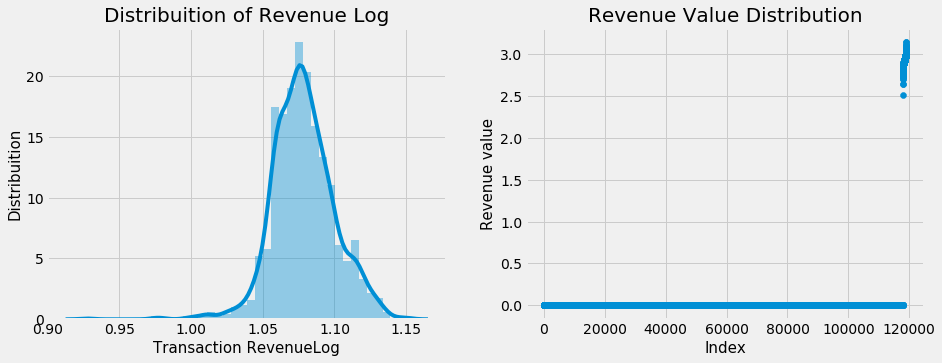

In [46]:
# Printing some statistics of our data
print("Transaction Revenue Min Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].min()) # printing the min value
print("Transaction Revenue Mean Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean()) # mean value
print("Transaction Revenue Median Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].median()) # median value
print("Transaction Revenue Max Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].max()) # the max value

# It I did to plot the quantiles but are not working
#print(round(df_train['totals.transactionRevenue'].quantile([.025,.25,.5,.75,.975]),2))

# seting the figure size of our plots
plt.figure(figsize=(14,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1
plt.subplot(1,2,1)
# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) #seting the title and size of font

# setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # xlabel and size of words
plt.ylabel('Revenue value', fontsize=15) # ylabel and size of words
plt.title("Revenue Value Distribution", fontsize=20) # Setting Title and fontsize

plt.show()

Calculate outliers

In [47]:
def CalcOutliers(df_num):
    data_mean, data_std = np.mean(df_num),np.std(df_num)
    cut = data_std * 3
    lower, upper = data_mean-cut, data_mean+cut
    
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    outliers_removed = [x for x in df_num if x > lower and x < upper]
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Identified outliers: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

In [48]:
CalcOutliers(df_train['totals.transactionRevenue']) # Call 

Identified lowest outliers: 0
Identified upper outliers: 1236
Identified outliers: 1236
Non-outlier observations: 117800
Total percentual of Outliers:  1.0492


In [49]:
CalcOutliers(df_train['totals.pageviews'])

Identified lowest outliers: 0
Identified upper outliers: 2120
Identified outliers: 2120
Non-outlier observations: 116916
Total percentual of Outliers:  1.8133


## Device Browsers 

Percent of Browser usage: 
Chrome               81509
Safari               21919
Firefox               4386
Internet Explorer     2482
Android Webview       2405
Edge                  1425
Samsung Internet      1186
Name: device.browser, dtype: int64


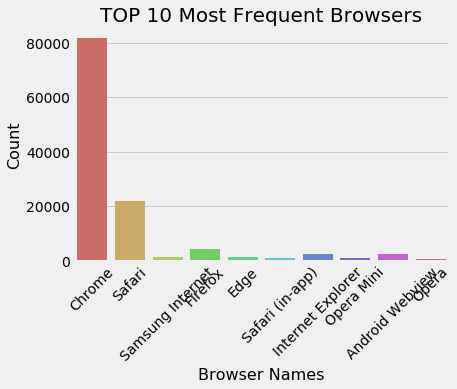

In [50]:
print("Percent of Browser usage: ")
print(df_train['device.browser'].value_counts()[:7])
# Let explore the browser used by users
sns.countplot(df_train[df_train['device.browser']\
                       .isin(df_train['device.browser']\
                             .value_counts()[:10].index.values)]['device.browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

Text(0,0.5,'Trans Revenue(log) Dist')

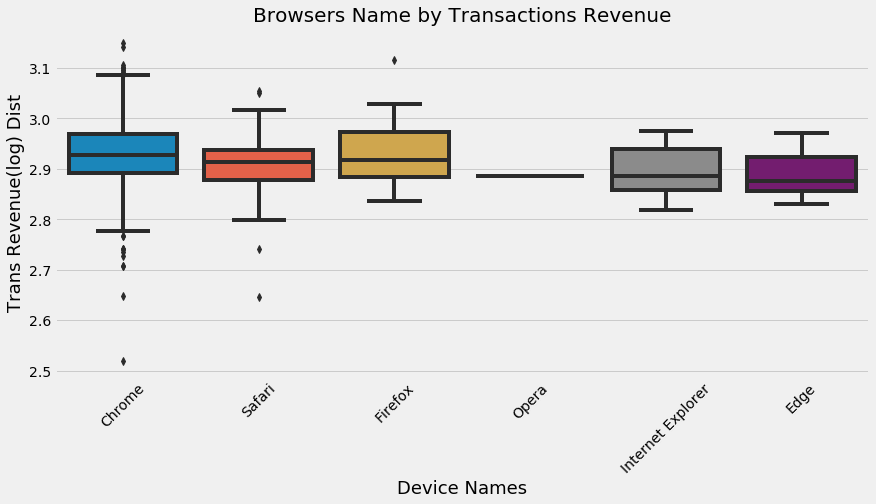

In [51]:
plt.figure(figsize=(13,6))
g1 = sns.boxplot(x='device.browser', y='totals.transactionRevenue', data = df_train[(df_train['device.browser'].isin((df_train['device.browser'].value_counts()[:10].index.values))) &
                                  df_train['totals.transactionRevenue'] > 0])
g1.set_title('Browsers Name by Transactions Revenue', fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Device Names', fontsize=18) # Xlabel
g1.set_ylabel('Trans Revenue(log) Dist', fontsize=18) #Ylabel

Channel Grouping

Percentual of Channel Grouping used: 
Organic Search    51237
Social            24722
Direct            19246
Referral          14833
Display            3684
Name: channelGrouping, dtype: int64


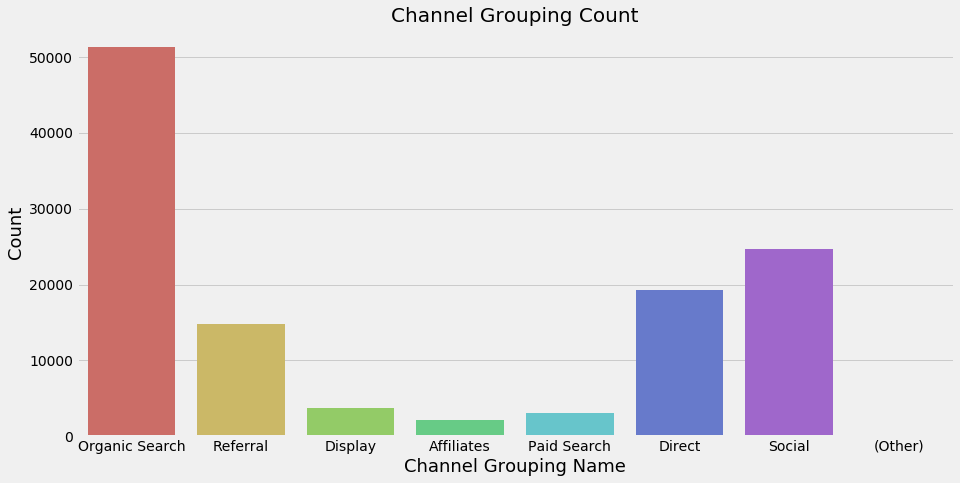

In [52]:
print("Percentual of Channel Grouping used: ")
print((df_train['channelGrouping'].value_counts()[:5])) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["channelGrouping"], palette="hls") # It's a module to count the category's
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size

plt.show() #use plt.show to render the graph that we did above

Channel grouping Vs Browsers

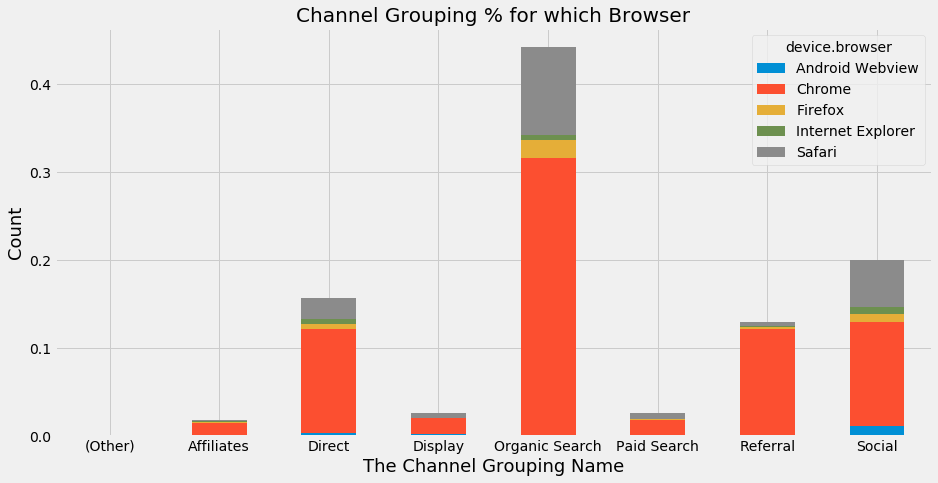

In [53]:
crosstab_eda = pd.crosstab(index=df_train['channelGrouping'],normalize=True,
                            columns=df_train[df_train['device.browser'].isin(df_train['device.browser'].value_counts()[:5].index.values)]['device.browser'])
crosstab_eda.plot(kind="bar",    # select the bar to plot the count of categoricals
                 figsize=(14,7), # adjusting the size of graphs
                 stacked=True)   # code to unstack
plt.title("Channel Grouping % for which Browser", fontsize=20) # seting the title size
plt.xlabel("The Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size
plt.xticks(rotation=0)
plt.show() # rendering

##### Operating System

Percentual of Operational System: 
Windows      42811
Macintosh    30721
Android      21016
iOS          15442
Linux         4372
Name: device.operatingSystem, dtype: int64


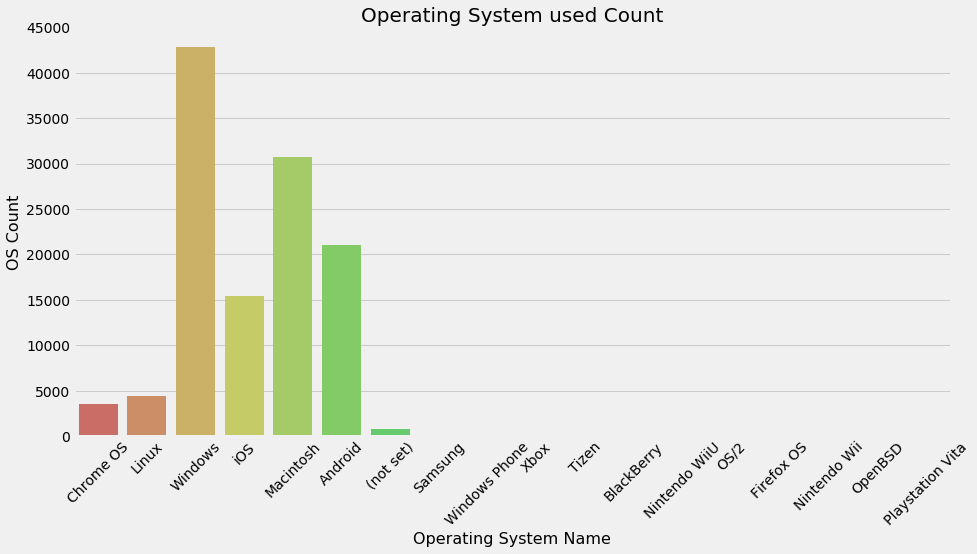

In [54]:
# the top 5 of browsers represent % of total
print("Percentual of Operational System: ")
print(df_train['device.operatingSystem'].value_counts()[:5]) # printing the top 7 percentage of browsers

# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["device.operatingSystem"], palette="hls") # It's a module to count the category's
plt.title("Operating System used Count", fontsize=20) # seting the title size
plt.xlabel("Operating System Name", fontsize=16) # seting the x label size
plt.ylabel("OS Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

In [58]:
#year, month, day counts
year = df_train['_year'].value_counts()
month = df_train['_month'].value_counts()      # counting months
weeday = df_train['_weekday'].value_counts()    # Counting weekday
day = df_train['_day'].value_counts()              # counting Day
date = df_train['date'].value_counts()           # Counting date

In [59]:
# I saw and take a lot of inspiration to this interactive plots in kernel: 
# https://www.kaggle.com/jsaguiar/complete-exploratory-analysis-all-columns
# I learned a lot in this kernel and I will implement and adapted some ideas

#seting some static color options
color_op = ['#5527A0', '#BB93D7', '#834CF7', '#6C941E', '#93EAEA', '#7425FF', '#F2098A', '#7E87AC', 
            '#EBE36F', '#7FD394', '#49C35D', '#3058EE', '#44FDCF', '#A38F85', '#C4CEE0', '#B63A05', 
            '#4856BF', '#F0DB1B', '#9FDBD9', '#B123AC']

# Visits by time train

# couting all entries by date to get number of visits by each date
dates_temp = df_train['date'].value_counts().to_frame().reset_index().sort_values('index') 
# renaming the columns to apropriate names
dates_temp = dates_temp.rename(columns = {"date" : "visits"}).rename(columns = {"index" : "date"})

# creating the first trace with the necessary parameters
trace = go.Scatter(x=dates_temp.date.astype(str), y=dates_temp.visits,
                    opacity = 0.8, line = dict(color = color_op[3]), name= 'Visits by day')

# Below we will get the total values by Transaction Revenue Log by date
dates_temp_sum = df_train.groupby('date')['totals.transactionRevenue'].sum().to_frame().reset_index()

# using the new dates_temp_sum we will create the second trace
trace1 = go.Scatter(x=dates_temp_sum.date.astype(str), line = dict(color = color_op[1]), name="RevenueLog by day",
                        y=dates_temp_sum['totals.transactionRevenue'], opacity = 0.8)

# Getting the total values by Transactions by each date
dates_temp_count = df_train[df_train['totals.transactionRevenue'] > 0].groupby('date')['totals.transactionRevenue'].count().to_frame().reset_index()

# using the new dates_temp_count we will create the third trace
trace2 = go.Scatter(x=dates_temp_count.date.astype(str), line = dict(color = color_op[5]), name="Sellings by day",
                        y=dates_temp_count['totals.transactionRevenue'], opacity = 0.8)

#creating the layout the will allow us to give an title and 
# give us some interesting options to handle with the outputs of graphs
layout = dict(
    title= "Informations by Date",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date'
    )
)

# creating figure with the both traces and layout
fig = dict(data= [trace, trace1, trace2], layout=layout)

#rendering the graphs
iplot(fig) #it's an equivalent to plt.show()

In [60]:
# Setting the first trace
trace1 = go.Histogram(x=df_train["_year"],
                      name='Year Count')

# Setting the second trace
trace2 = go.Histogram(x=df_train["_month"],
                name='Month Count')

# Setting the third trace
trace3 = go.Bar(y=day.values,
                x=day.index.values, 
                name='Day Count')

# Setting the fourth trace
trace4 = go.Bar(y=weeday.values,
                x=weeday.index.values,
                name='Weekday Count')

# puting all traces in the same "array of graphics" to we render it below
data = [trace1, trace2, trace4, trace3]

#Creating the options to be posible we use in our 
updatemenus = list([
    dict(active=-1,
         x=-0.15,
         buttons=list([  
             dict(
                 label = 'Years Count',
                 method = 'update',
                 args = [{'visible': [True, False, False, False,False]}, 
                         {'title': 'Count of Year'}]),
             dict(
                 label = 'Months Count',
                 method = 'update',
                 args = [{'visible': [False, True, False, False,False]},
                         {'title': 'Count of Months'}]),
             dict(
                 label = 'WeekDays Count',
                 method = 'update',
                 args = [{'visible': [False, False, True, False, False]},
                         {'title': 'Count of WeekDays'}]),
            dict(
                label = 'Days Count ',
                method = 'update',
                args = [{'visible': [False, False, False, True,False]},
                        {'title': 'Count of Day'}]) ])
    )
])


layout = dict(title='The percentual Distribuitions of Date Features (Select from Dropdown)',
              showlegend=False,
              updatemenus=updatemenus,
#              xaxis = dict(
#                  type="category"
#                      ),
              barmode="group"
             )
fig = dict(data=data, layout=layout)
print("SELECT BELOW: ")
iplot(fig)

SELECT BELOW: 


VisitHour and weekday to see if we can find some interesting patterns

In [61]:
date_sales = ['_visitHour', '_weekday'] #seting the desired 

cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df_train[date_sales[0]], df_train[date_sales[1]], 
            values=df_train["totals.transactionRevenue"], aggfunc=[np.sum]).style.background_gradient(cmap = cm)

# tab.columns.levels[1] = ["Sun", "Mon", "Thu", "wed", "Thi","Fri","Sat"]

In [62]:
number_of_colors = 20 # total number of different collors that we will use

# Here I will generate a bunch of hexadecimal colors 
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]

Description most frequent countrys: 
United States     50101
India              7264
United Kingdom     5082
Canada             3612
Germany            2623
Japan              2554
Brazil             2460
Vietnam            2413
France             2237
Thailand           2068
Turkey             2015
Taiwan             1761
Mexico             1746
Australia          1710
Netherlands        1601
Name: geoNetwork.country, dtype: int64


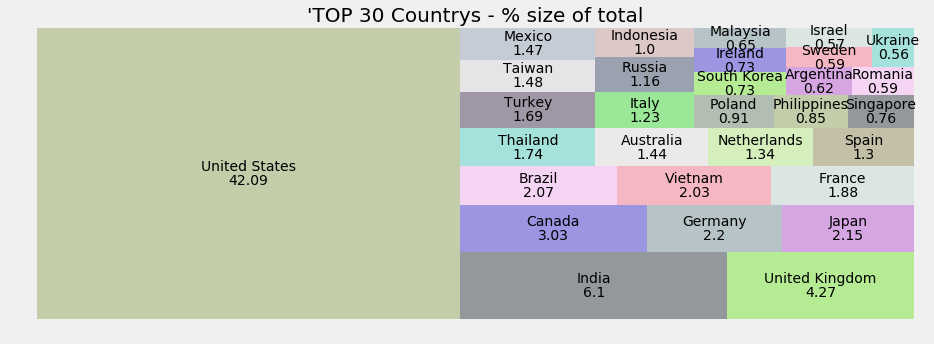

In [63]:
country_tree = df_train["geoNetwork.country"].value_counts() #counting the values of Country

print("Description most frequent countrys: ")
print(country_tree[:15]) #printing the 15 top most 

country_tree = round((df_train["geoNetwork.country"].value_counts()[:30] \
                       / len(df_train['geoNetwork.country']) * 100),2)

plt.figure(figsize=(14,5))
g = squarify.plot(sizes=country_tree.values, label=country_tree.index, 
                  value=country_tree.values,
                  alpha=.4, color=color)
g.set_title("'TOP 30 Countrys - % size of total",fontsize=20)
g.set_axis_off()
plt.show()